In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
print(type(X_train))
print(X_train[0].shape)

<class 'numpy.ndarray'>
(28, 28)


In [5]:
print("Training data set : ", X_train.shape)
print("Test data set : ", X_test.shape)
print("Training labels : ", Y_train.shape)
print("Test labels : ", Y_test.shape)

Training data set :  (60000, 28, 28)
Test data set :  (10000, 28, 28)
Training labels :  (60000,)
Test labels :  (10000,)


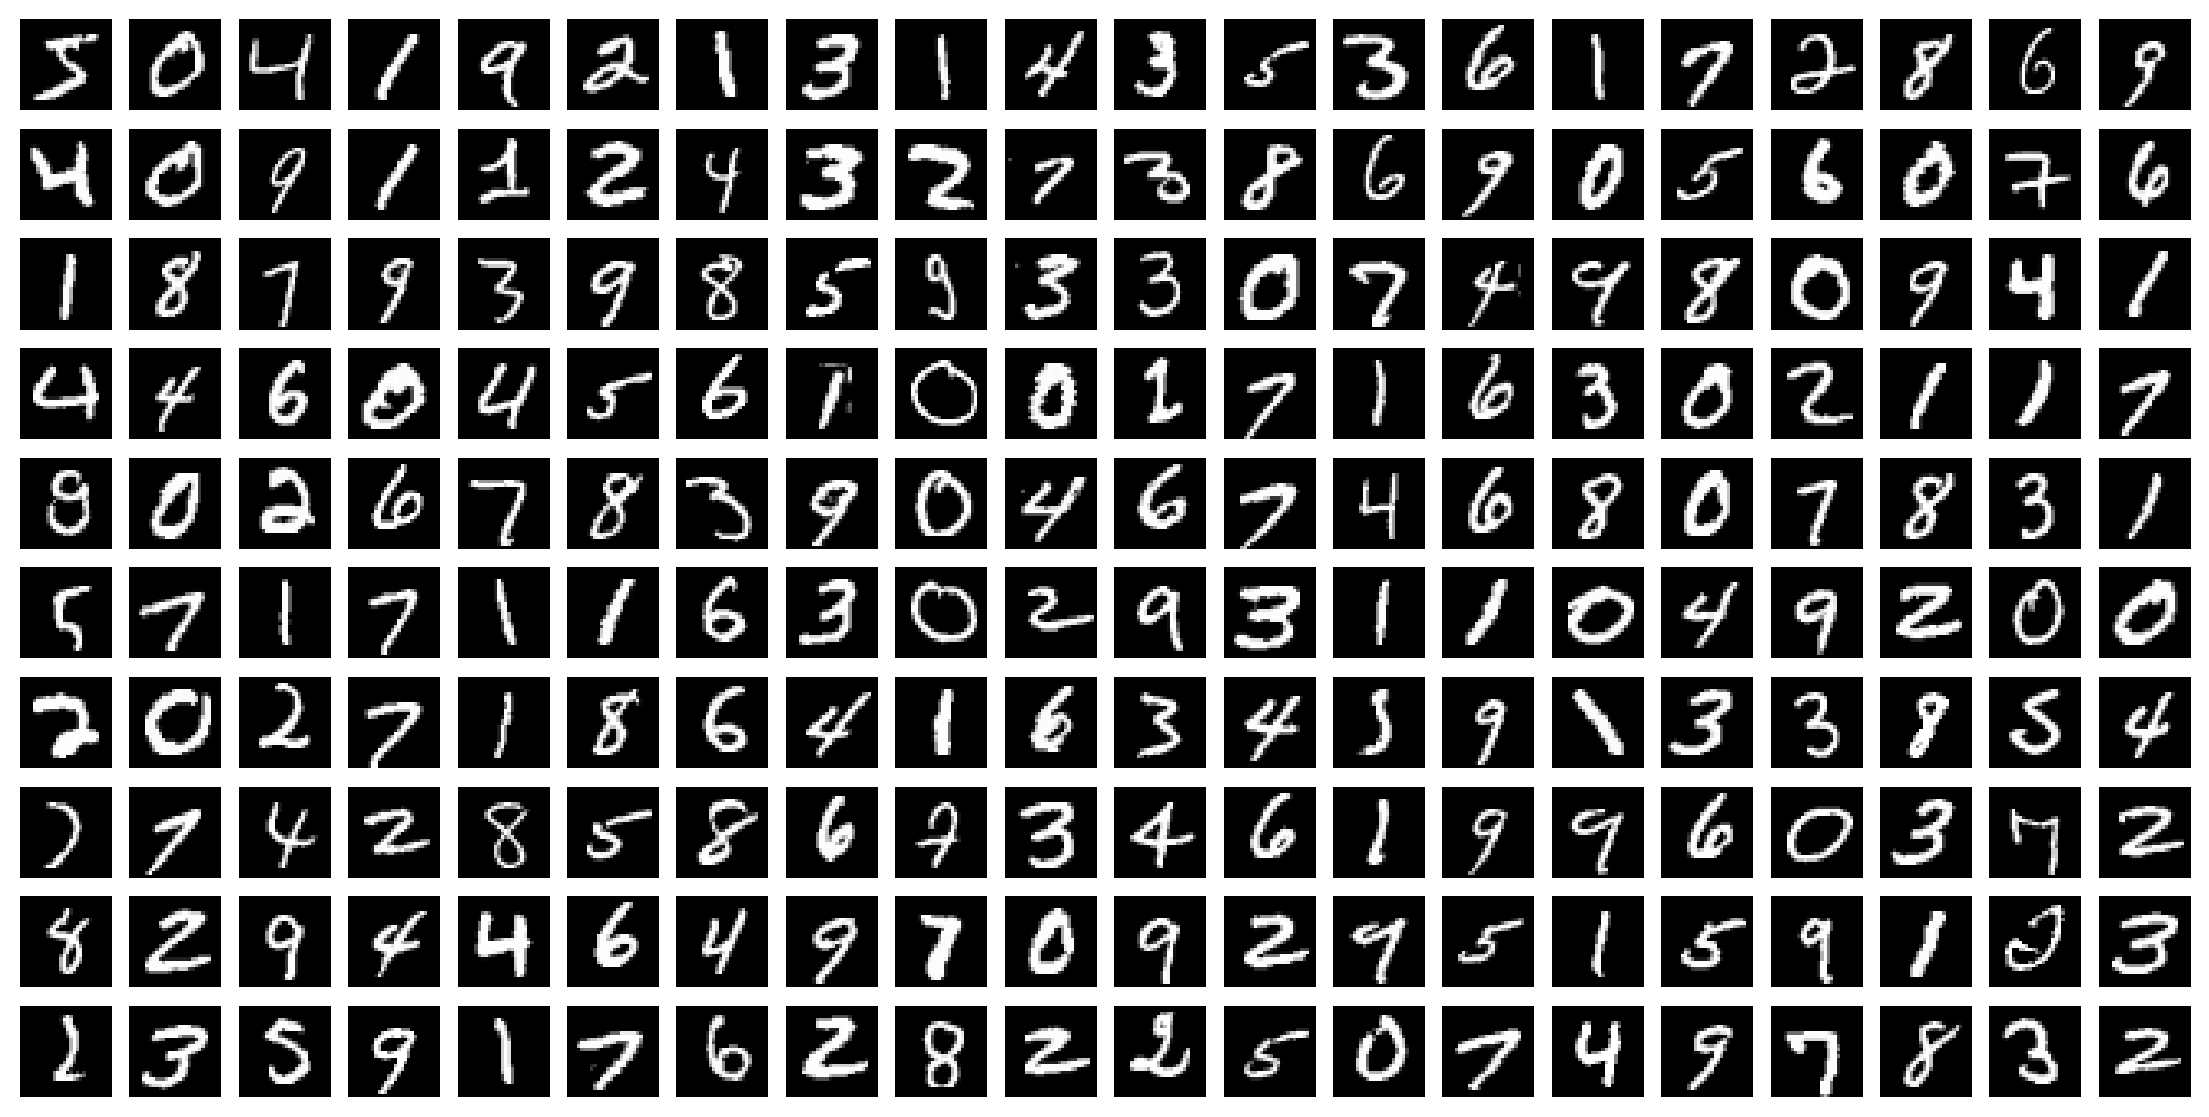

In [6]:
plt.figure(figsize=(14,7), dpi=200)
for i in range(200):
  plt.subplot(10,20, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.axis('off')

In [7]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [8]:
print("Training data set : ", X_train.shape)
print("Test data set : ", X_test.shape)
print("Training labels : ", Y_train.shape)
print("Test labels : ", Y_test.shape)

Training data set :  (60000, 28, 28)
Test data set :  (10000, 28, 28)
Training labels :  (60000, 10)
Test labels :  (10000, 10)


In [10]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)

## Data Augmentation

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    )
train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train, Y_train, batch_size = 500)

In [12]:
val_datagen = ImageDataGenerator(rescale=1/255)
val_datagen.fit(X_test)
val_generator = val_datagen.flow(X_test, Y_test)

Normalizing data sets

In [13]:
X_train = X_train/255
X_test = X_test/255

## Steps to train a neural network
1. Create an architecture
2. Compile the model
3. Fit the  model

In [19]:
# Creating the architecture
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (28,28,1)))
model.add(Dense(500, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 300)                 │         150,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 605,010 (2.31 MB)

 Trainable params: 605,010 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

In [21]:
 # Fit the model
 history = model.fit(train_generator,
                     validation_data = val_generator,
                     epochs = 80,
                     verbose = 1
                     )

Epoch 1/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.1915 - loss: 2.2630 - val_accuracy: 0.6051 - val_loss: 1.9704
Epoch 2/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 158ms/step - accuracy: 0.4660 - loss: 2.0100 - val_accuracy: 0.7114 - val_loss: 1.4905
Epoch 3/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.5466 - loss: 1.6617 - val_accuracy: 0.7735 - val_loss: 1.0508
Epoch 4/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 139ms/step - accuracy: 0.6007 - loss: 1.3685 - val_accuracy: 0.8140 - val_loss: 0.8154
Epoch 5/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.6404 - loss: 1.1917 - val_accuracy: 0.8364 - val_loss: 0.6936
Epoch 6/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 19s 146ms/step - accuracy: 0.6746 - loss: 1.0700 - val_accuracy: 0.8551 - val_loss: 0.6177
Epoch 7/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.7057 - loss: 0.9789 - val_accuracy: 0.8681 - val_loss: 0.5670
Epoch 8/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - accuracy: 0.7260 - loss: 0

In [22]:
print(type(history.history))
print(history.history.keys())

<class 'dict'>
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [23]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

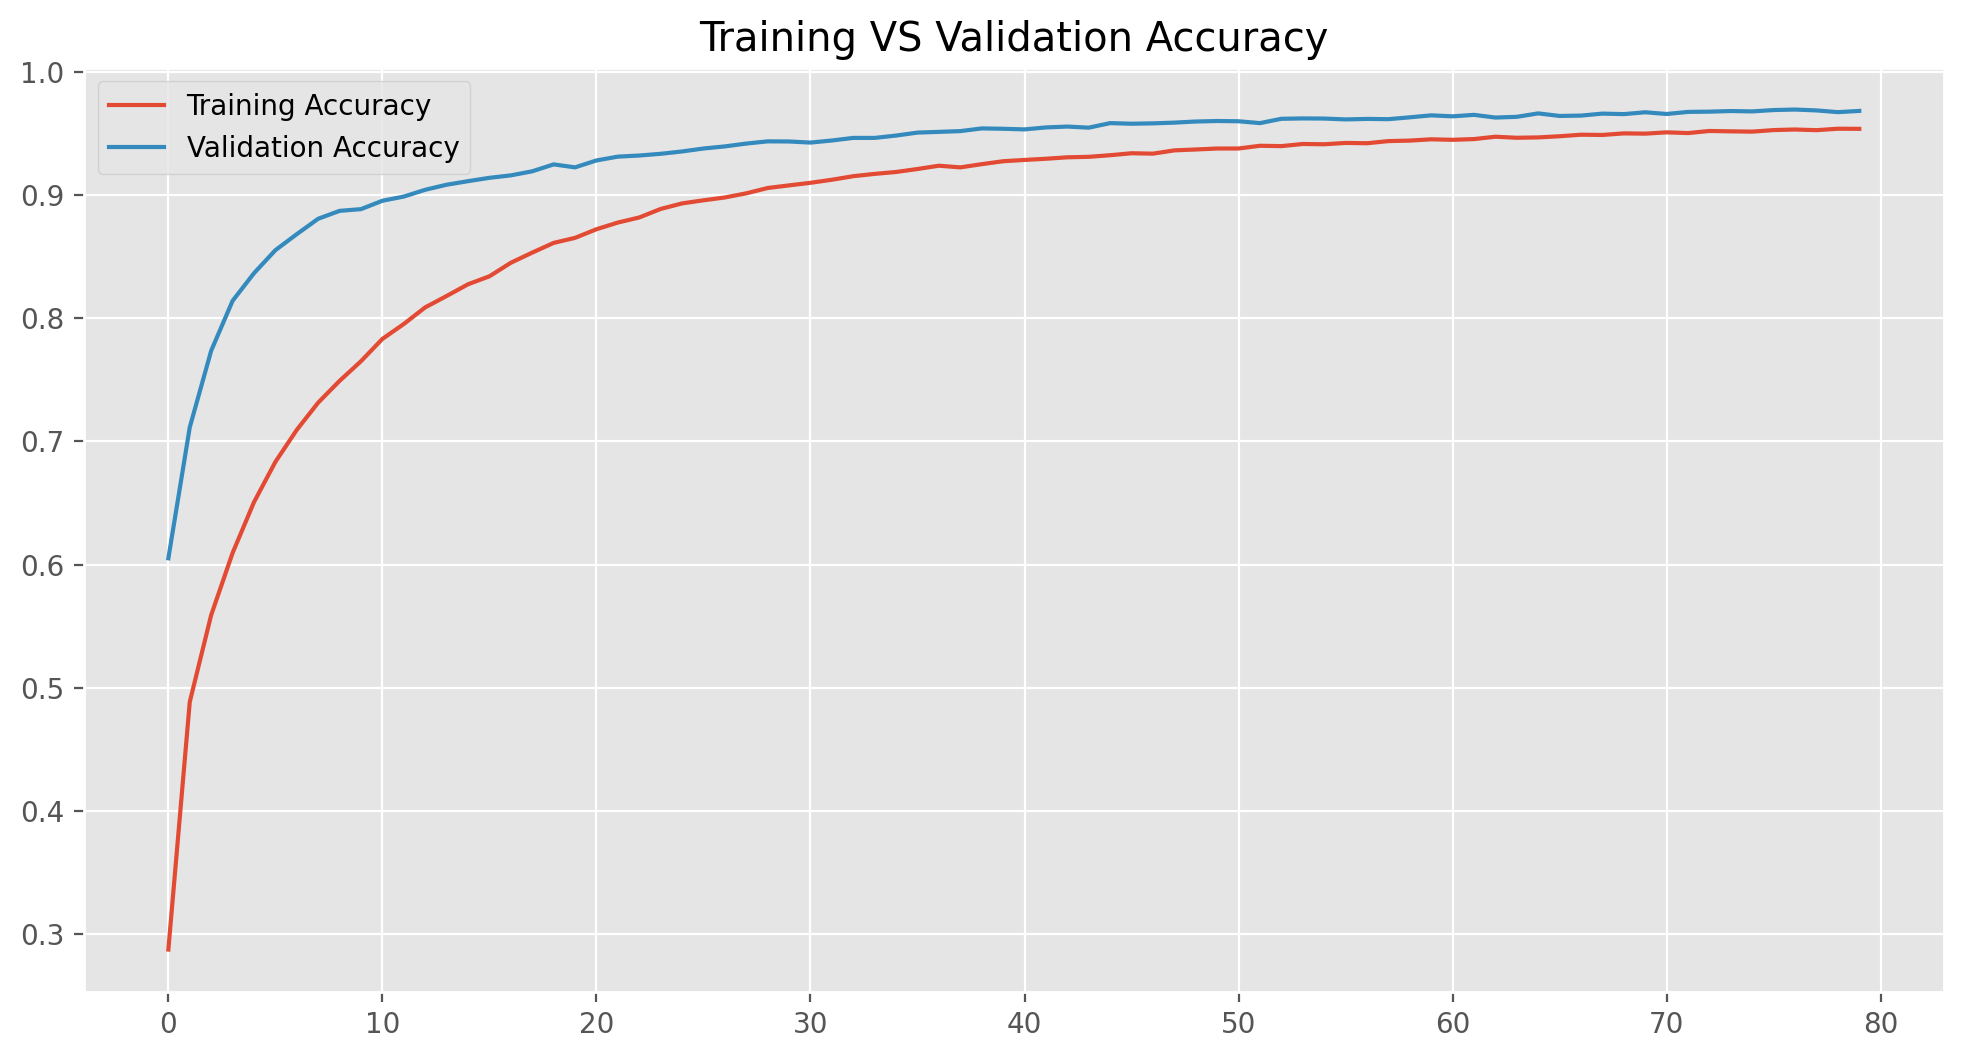

In [24]:
plt.figure(figsize=(12,6), dpi=200)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title("Training VS Validation Accuracy")
plt.legend()

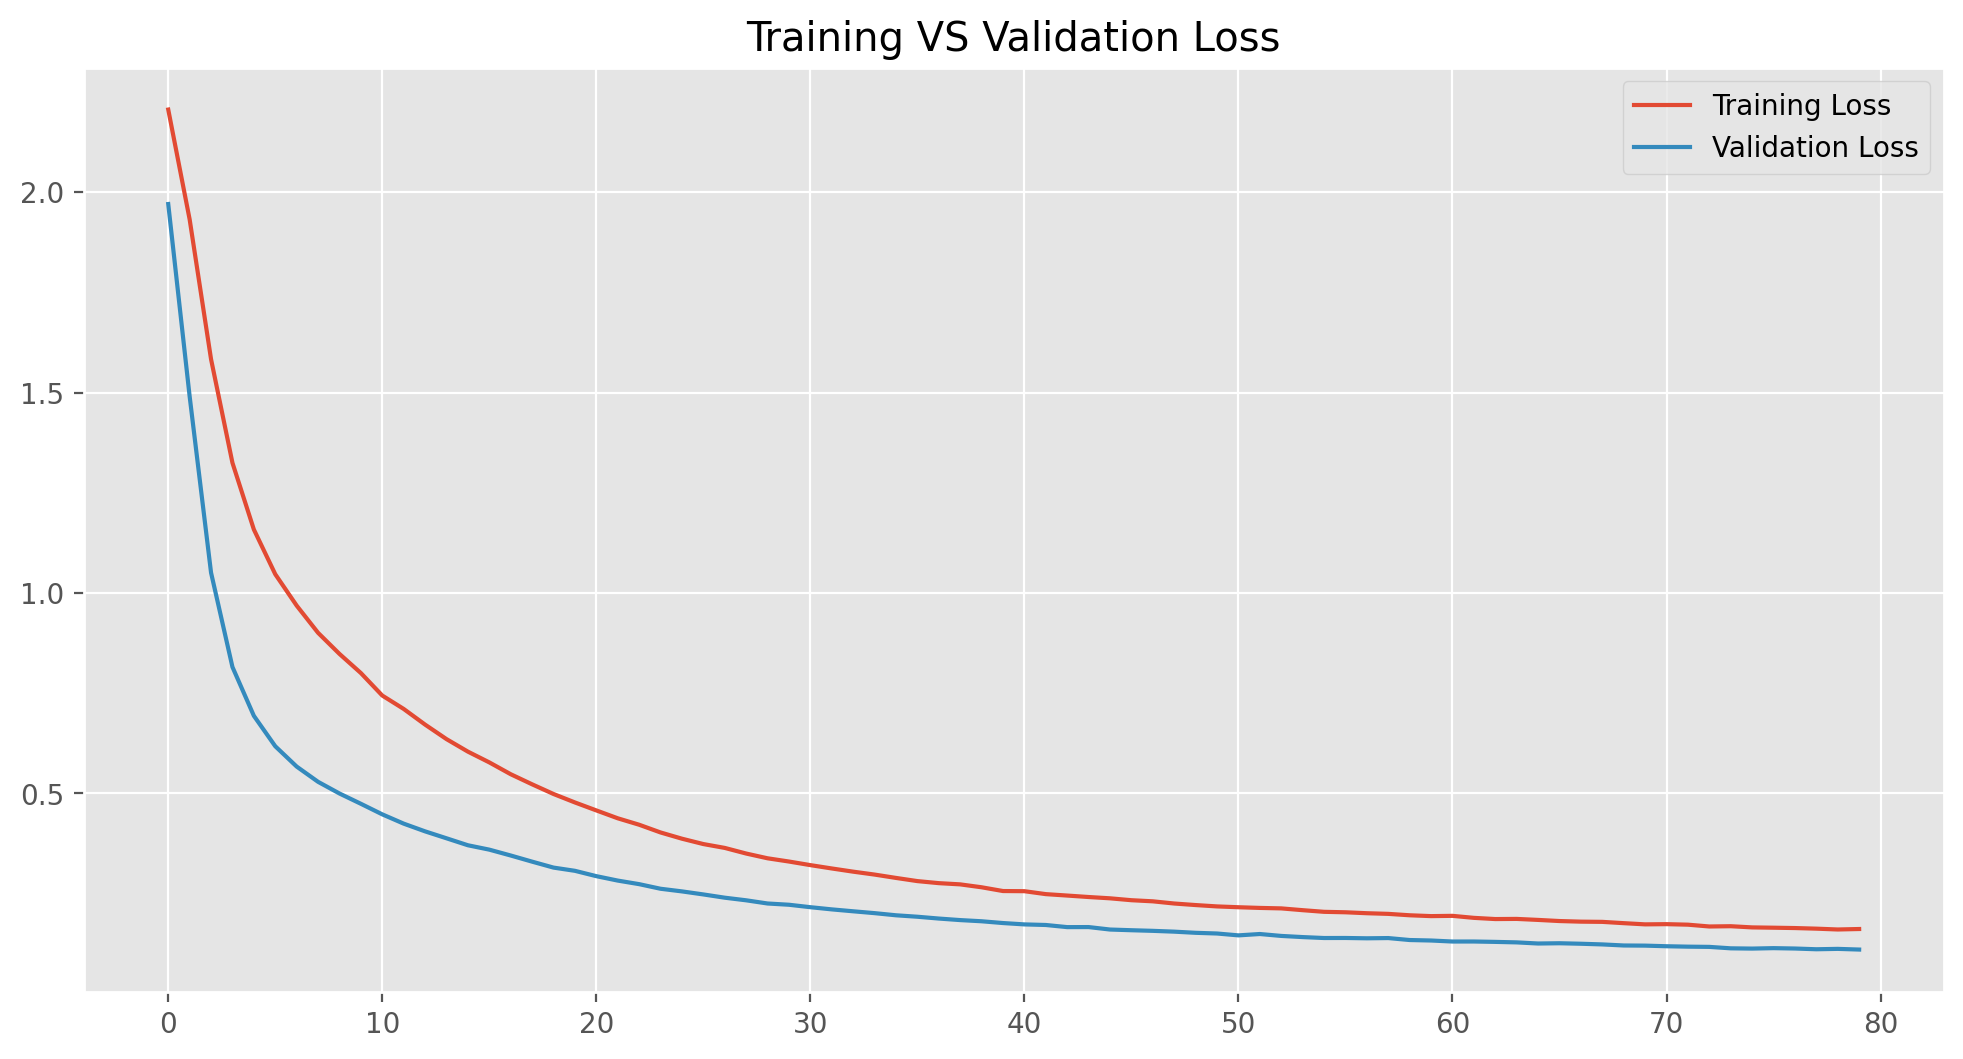

In [25]:
plt.figure(figsize=(12,6), dpi=200)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title("Training VS Validation Loss")
plt.legend()

In [26]:
# Prediction
Y_pred = model.predict(X_test[0:1])
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


array([[2.2897818e-06, 2.4335222e-05, 9.3375723e-04, 2.4485856e-04,
        3.5807182e-09, 2.3110708e-06, 4.9214216e-11, 9.9877232e-01,
        1.6394825e-06, 1.8436722e-05]], dtype=float32)

In [27]:
np.argmax(Y_pred, axis=1)

array([7])

In [28]:
np.argmax(model.predict(X_test[0:25]), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4])

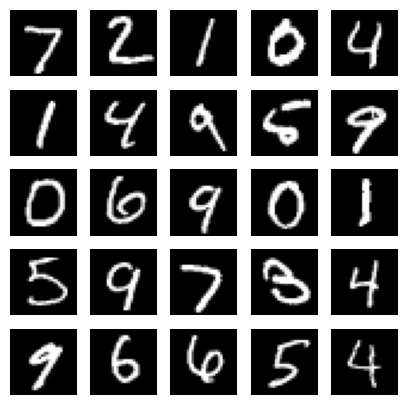

In [29]:
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(X_test[i], cmap='gray')
  plt.axis('off')